## Sentiment Analysis on Amazon Fine Food Reviews:

### Introduction:
In this project, I produced a sentiment analysis covering over 500,000 reviews from an Amazon Fine Food Review dataset. I classified all positive and negative customer reviews and then created word clouds, plotly visualizations, and a text classification model to display my analysis further.

### Data : 
For this project, I used the Amazon Fine Food Review [dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews?select=Reviews.csv) found on Kaggle.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

import plotly.express as px
import re
def plot_cloud(wordcloud): 
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

def __iter__(self): return 0

In [2]:
print("All imports installed...!")

All imports installed...!


In [3]:
amazon = pd.read_csv('Reviews.csv')
amazon.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

### Methodology: 

To prepare for this analysis, I visualized the product scores from the dataset in a histogram using the plotly library.

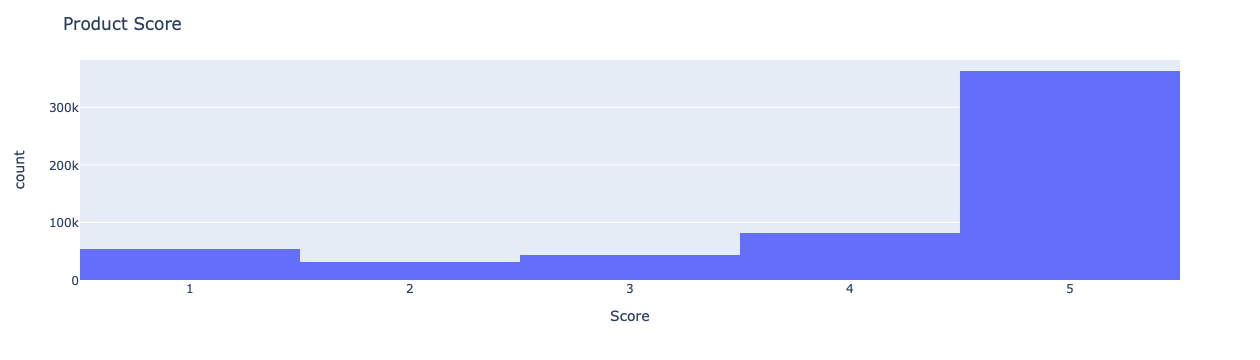

In [4]:
# Visualizing Product Scores - Histogram

fig = px.histogram(amazon, x="Score")
fig.update_layout(title_text = "Product Score")
fig.show()

From the blue histogram, we can see more positive customer ratings than negative. Therefore, the majority of Amazon’s product reviews are positive.

Next, I created a word cloud to show the most frequently used words in the text (review) column.

### Review Word Cloud 

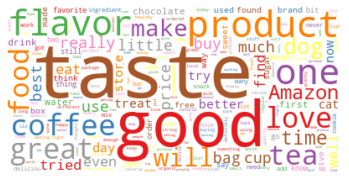

In [5]:
text = " ".join(review for review in amazon.Text)

# Removing errors in Text column
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

wordcloud = WordCloud(stopwords=stopwords, background_color = "white", colormap = 'Set1', collocations = False).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Next, I added a sentiment column by classifying only positive and negative reviews using the dataset's 'Score' column. For this sentiment, I categorized all positive reviews as scores > 3, negative for scores < 3, and dropped all neutral scores, which  = 3. Note, the sentiment column will later be used as training data for the sentiment classification model. 

In [6]:
amazon = amazon[amazon.Score != 3]

# Postive = 1 
# Negative = -1

amazon ["Sentiment"] = amazon["Score"].apply(lambda x: -1 if x < 3 else +1)

amazon.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

   Sentiment  
0          1  
1         -1  
2          1  
3         -1  
4          1


After building the sentiment column, I also created word clouds to display the most frequently used words for both positive and negative product reviews, respectfully. In addition, I made a product sentiment histogram to show the distribution of reviews with sentiment across the dataset.

In [ ]:
# Postive Word Cloud

positive = amazon[amazon["Sentiment"] == 1]

text = " ".join(review for review in positive.Text)

text = text.replace('\n', "")

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

wordcloud.postive = WordCloud(stopwords=stopwords, background_color = "black", colormap = 'Set2', collocations = False).generate(text)

plt.imshow(wordcloud.postive, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Negative Word Cloud

negative = amazon[amazon["Sentiment"] == -1]

text = " ".join(review for review in negative.Text)

text = text.replace('\n', "")

stopwords = set(STOPWORDS)
stopwords.update(["good", "great", "br", "href"])

wordcloud.negative = WordCloud(stopwords=stopwords, background_color = "black", colormap = 'rainbow', collocations = False).generate(text)

plt.imshow(wordcloud.negative, interpolation='bilinear')
plt.axis("off")
plt.show()

## Product Sentiment Histogram

In [ ]:
amazon ["Sentiment_Rate"] = amazon["Sentiment"].apply(lambda x: "Negative" if x == -1 else "Positive")

fig = px.histogram(amazon, x = "Sentiment_Rate")

fig.update_traces(marker_color = 'orange', marker_line_width=1.5)

fig.update_layout(title_text = "Product Sentiment")

fig.show()

From the orange histogram, we can see that the product sentiment is more positive than negative. 


Finally, I created a text classification model to train and establish the accuracy of my data. I start by pre-processing the textual data using NLTK to remove special characters, lowercasing text, and stopwords. Then, I test the accuracy of the sentiment model by performing the Multi Nominal Naive Bayes Classification function using the scikit-learn library. 

In [ ]:
amazon.Summary = amazon['Summary'].str.replace('[^\w\s]','')

amazon.head()

In [ ]:
sentiment_df = amazon[["Summary", "Sentiment"]]

sentiment_df.head()

Data Pre-Processing

In [ ]:
df = sentiment_df

df["Summary"] = df["Summary"].astype(str)

# Change to lowercasing for all text reviews in 'Summary'

df["Summary"] = df["Summary"].apply(lambda x: " ".join(x.lower() for x in x.split()))

stop = set(stopwords)

df["Summary"] = df["Summary"].apply(lambda x: " ".join(x for x in x.split() if x not in stop ))


In [ ]:
cv = CountVectorizer(token_pattern=r'\b\w+\b')
text_counts = cv.fit_transform(df["Summary"])

X_train, X_test, y_train, y_test = train_test_split(
    text_counts, df["Sentiment"], test_size=0.3, random_state=1)

# Multinomial Naive Bayes Model
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)


print("Multinomial Naive Bayes Accuracy:",metrics.accuracy_score(y_test, predicted))

As a result, the overall classification rate has an approx. 90.5% accuracy!